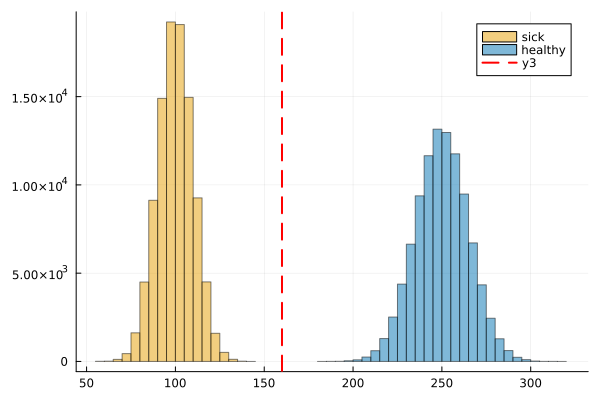

0.0 0.0


In [5]:
using Distributions
using Plots

function alphabeta_test(;mean_sick=100, sd_sick=10, mean_healthy=130, sd_healthy=10, cutoff=120, n=10000, side="below", do_plot=true)
    popsick = rand(Normal(mean_sick, sd_sick), n)
    pophealthy = rand(Normal(mean_healthy, sd_healthy), n)
    
    if side == "below"
        truepos = sum(popsick .<= cutoff)
        falsepos = sum(pophealthy .<= cutoff)
        trueneg = sum(pophealthy .> cutoff)
        falseneg = sum(popsick .> cutoff)
    elseif side == "above"
        truepos = sum(popsick .>= cutoff)
        falsepos = sum(pophealthy .>= cutoff)
        trueneg = sum(pophealthy .< cutoff)
        falseneg = sum(popsick .< cutoff)
    end
    
    spec = trueneg / (trueneg + falsepos)
    alpha = 1 - spec
    sens = pow = truepos / (truepos + falseneg)
    beta = 1 - sens
    
    pos_pred = truepos / (truepos + falsepos)
    neg_pred = trueneg / (trueneg + falseneg)
    
    if do_plot
        histogram(popsick, bins=30, alpha=0.5, label="sick", color="#E69F00")
        histogram!(pophealthy, bins=30, alpha=0.5, label="healthy", color="#0072B2")
        vline!([cutoff], color=:red, linestyle=:dash, linewidth=2)
        display(plot!())
    end

    return alpha, beta
end

alpha, beta = alphabeta_test(mean_sick=100, sd_sick=10, mean_healthy=250, sd_healthy=15, cutoff=160, n=100000, do_plot=true, side="below")
println(alpha, " ", beta)




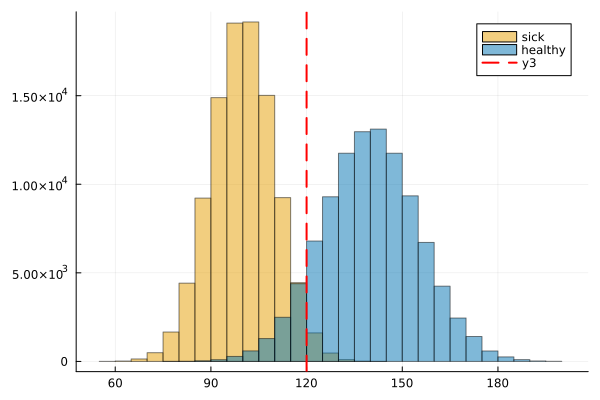

0.09187000000000001 0.02203999999999995


In [6]:
alpha2, beta2 = alphabeta_test(mean_sick=100, sd_sick=10, mean_healthy=140, sd_healthy=15, cutoff=120, n=100000, do_plot=true, side="below")
println(alpha2, " ", beta2)


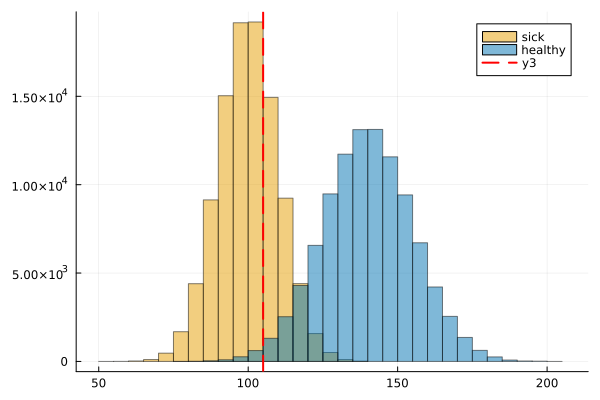

0.010220000000000007 0.30778000000000005


In [7]:
alpha3, beta3 = alphabeta_test(mean_sick=100, sd_sick=10, mean_healthy=140, sd_healthy=15, cutoff=105, n=100000, do_plot=true, side="below")
println(alpha3, " ", beta3)


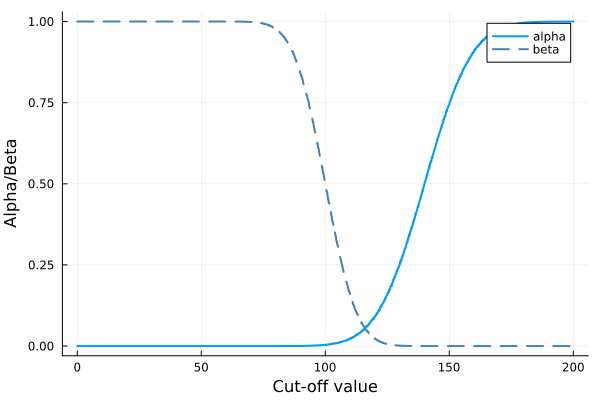

In [8]:
using Plots

cutoffs = 0:0.1:200
plot_frame = [alphabeta_test(mean_sick=100, sd_sick=10, mean_healthy=140, sd_healthy=15, cutoff=cutoff, n=50000, do_plot=false, side="below") for cutoff in cutoffs]

alpha_values = [x[1] for x in plot_frame]
beta_values = [x[2] for x in plot_frame]

p = plot(cutoffs, alpha_values, label="alpha", linewidth=2)
plot!(p, cutoffs, beta_values, label="beta", line=:dash, color="steelblue", linewidth=2)
xlabel!(p, "Cut-off value")
ylabel!(p, "Alpha/Beta")
display(p)


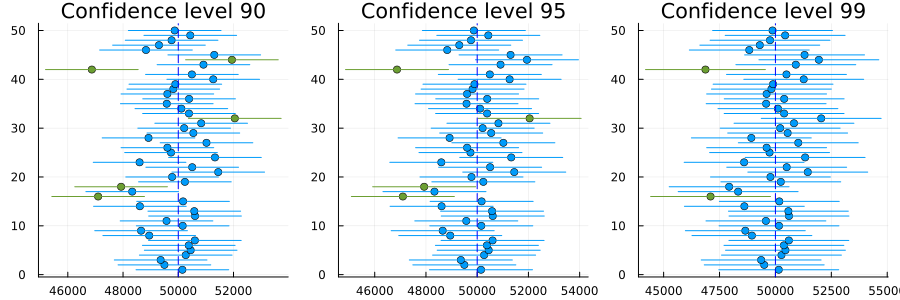

In [11]:
using Plots, StatsPlots, Random, DataFrames

Random.seed!(1321)

meanset = randn(50)*1000 .+ 50000
Sample = 1:50
ci_bounds = DataFrame(
  Mean = repeat(meanset, 3),
  Conf_level = repeat([90, 95, 99], inner = 50),
  upper = repeat(meanset, 3) + repeat([1677, 2010, 2680], inner = 50),
  lower = repeat(meanset, 3) - repeat([1677, 2010, 2680], inner = 50)
)

ci_data = hcat(DataFrame(Sample = repeat(Sample, 3)), ci_bounds)
ci_data[!, :Capture] = [ci_data.lower[i] < 50000 && ci_data.upper[i] > 50000 ? 1 : 0 for i in 1:nrow(ci_data)]

p = plot(layout = (1, 3), legend = false, size = (900, 300))
titles = ["Confidence level 90", "Confidence level 95", "Confidence level 99"]
for (i, conf_level) in enumerate([90, 95, 99])
    data = ci_data[ci_data[:, :Conf_level] .== conf_level, :]
    scatter!(p[i], data.Mean, data.Sample, color = data.Capture, title = titles[i])
    for j in 1:nrow(data)
        plot!(p[i], [data.lower[j], data.upper[j]], [data.Sample[j], data.Sample[j]], color = data.Capture[j])
    end
    vline!(p[i], [50000], linestyle = :dash, color = "blue")
end
p

In [110]:
using StatsModels

count = [57, 43]
nobs = [126, 121]

# Calculate the confidence interval for the difference in proportions
prop1 = count[1] / nobs[1]
prop2 = count[2] / nobs[2]
se_diff = sqrt(prop1 * (1 - prop1) / nobs[1] + prop2 * (1 - prop2) / nobs[2])
diff = prop1 - prop2
margin_of_error = 1.96 * se_diff
conf_int = (diff - margin_of_error, diff + margin_of_error)

conf_int


(-0.02475374476862678, 0.21877184787763904)

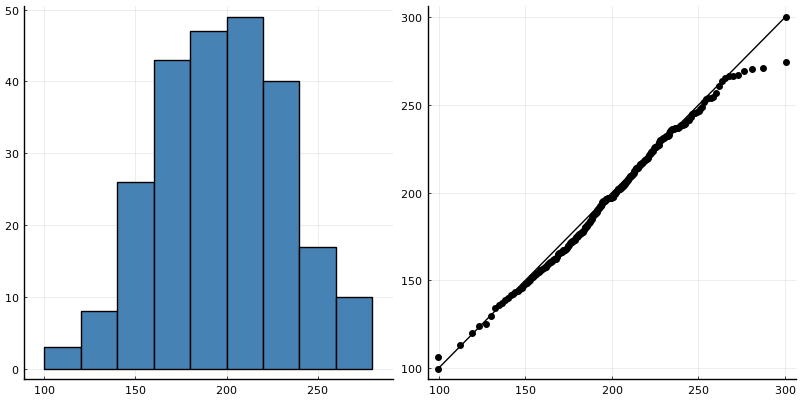

In [113]:
using Random, Statistics, Plots, StatsPlots

Random.seed!(321)

stille_lengde = DataFrame(id = 1:243, lengde = rand(Normal(200, 35), 243))

# Create the histogram
histogram_plot = histogram(stille_lengde.lengde, fillcolor = "steelblue",
    linecolor = "black", legend = false)

# Create the Q-Q plot
qq_plot = qqplot(Normal(200, 35), stille_lengde.lengde, marker = :circle,
    color = :black, legend = false)

# Combine the plots side-by-side
plot_combined = plot(histogram_plot, qq_plot, layout = (1, 2), size = (800, 400))


In [114]:
round(mean(stille_lengde.lengde), digits=2)

197.78

In [115]:
using Distributions

qt_verdi = quantile(TDist(242), 1 - 0.05/2)
round(qt_verdi, digits=2)


1.97

In [116]:
sd_value = std(stille_lengde[!, :lengde], corrected=false)
round(sd_value, digits=2)

35.32

In [118]:
using CSV, DataFrames

sinkdata = CSV.read("sinkdata.csv", DataFrame)
sinkdata.Differanse = sinkdata.Bunn - sinkdata.Overflate
println(sinkdata)

10×3 DataFrame
 Row │ Bunn     Overflate  Differanse 
     │ Float64  Float64    Float64    
─────┼────────────────────────────────
   1 │   0.43       0.415       0.015
   2 │   0.266      0.238       0.028
   3 │   0.567      0.39        0.177
   4 │   0.531      0.41        0.121
   5 │   0.707      0.605       0.102
   6 │   0.716      0.609       0.107
   7 │   0.651      0.632       0.019
   8 │   0.589      0.523       0.066
   9 │   0.469      0.411       0.058
  10 │   0.723      0.612       0.111


In [120]:
using CSV, DataFrames, Distributions

gjennomsnitt = mean(sinkdata.Differanse)
sd = round(std(sinkdata.Differanse), digits=4)
t_verdi = round(quantile(TDist(9), 0.05 / 2), digits=4)

println("Gjennomsnittsdifferansen er $gjennomsnitt")


Gjennomsnittsdifferansen er 0.0804


In [121]:
println("Standardavviket for gjennomsnittsdifferansen er $sd")


Standardavviket for gjennomsnittsdifferansen er 0.0523


In [122]:
println("T-verdien er $t_verdi")


T-verdien er -2.2622


In [125]:
margin_error = t_verdi * (sd / sqrt(size(sinkdata, 1)))
grenser = round.([gjennomsnitt + margin_error, gjennomsnitt - margin_error], digits=4)
println("Konfidensintervallet er (", grenser[1], ",", grenser[2], ")")


Konfidensintervallet er (0.043,0.1178)


In [126]:
using CSV, DataFrames

sys_bt2 = CSV.read("sys_bt2.csv", DataFrame)
sys_bt2 = dropmissing(select(sys_bt2, [:RIAGENDR, :BPXSY1]))


Row,RIAGENDR,BPXSY1
,String,Int64
1,Female,100
2,Male,104
3,Female,144
4,Male,138
5,Female,120
6,Male,130
7,Female,114
8,Female,110
9,Female,90


In [128]:
using Statistics

# Group by "RIAGENDR" and calculate summary statistics
summary_stats = combine(groupby(sys_bt2, :RIAGENDR)) do df
    DataFrame(
        n = size(df, 1),
        min = minimum(df.BPXSY1),
        q1 = quantile(df.BPXSY1, 0.25),
        median = median(df.BPXSY1),
        mean = mean(df.BPXSY1),
        q3 = quantile(df.BPXSY1, 0.75),
        max = maximum(df.BPXSY1),
        IQR = quantile(df.BPXSY1, 0.75) - quantile(df.BPXSY1, 0.25),
        sd = std(df.BPXSY1)
    )
end

summary_stats


Row,RIAGENDR,n,min,q1,median,mean,q3,max,IQR,sd
,String,Int64,Int64,Float64,Float64,Float64,Float64,Int64,Float64,Float64
1,Female,3427,74,104.0,114.0,117.169,124.0,270,20.0,19.7435
2,Male,3241,78,110.0,118.0,121.026,130.0,220,20.0,17.6252


In [141]:
using Pingouin
using DataFrames

male_bp = sys_bt2[sys_bt2.RIAGENDR .== "Male", :BPXSY1]
female_bp = sys_bt2[sys_bt2.RIAGENDR .== "Female", :BPXSY1]

Pingouin.normality(male_bp)

Row,W,pval,normal
,Float64,Float64,Bool
1,0.944009,2.06537e-33,false


In [139]:
Pingouin.normality(female_bp)

Row,W,pval,normal
,Float64,Float64,Bool
1,0.885138,7.48085e-45,false


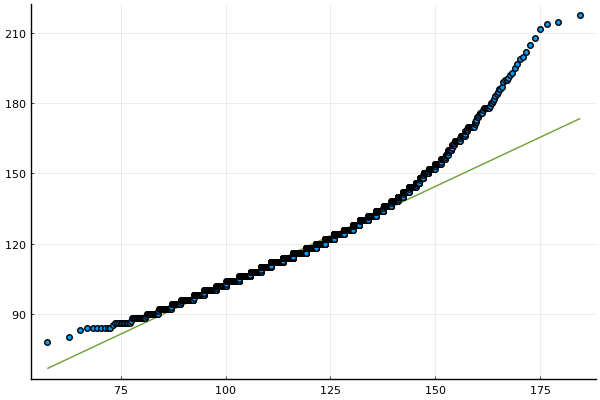

In [165]:
using StatsPlots

qqnorm(male_bp, qqline = :R)

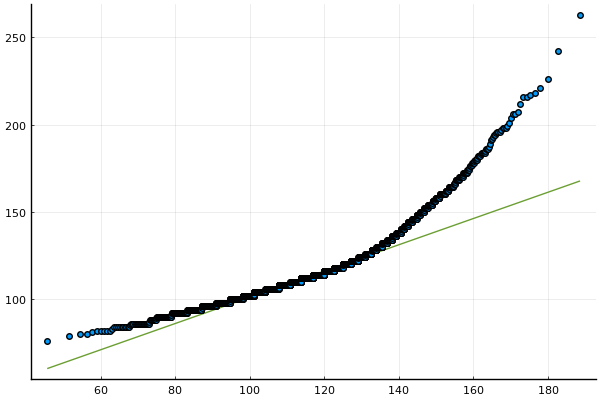

In [166]:
using StatsPlots

qqnorm(female_bp, qqline = :R)

In [173]:
using HypothesisTests

LeveneTest(male_bp, female_bp)

Levene's test
-------------
Population details:
    parameter of interest:   Variances
    value under h_0:         "all equal"
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     0.0009

Details:
    number of observations: [3241, 3427]
    W statistic:            11.0074
    degrees of freedom:     (1, 6666)


In [175]:
using Distributions

t_quantile = quantile(TDist(66), 0.05 / 2)
abs(t_quantile)


1.9965644189523122

In [177]:
using Distributions

t_quantile2 = quantile(TDist(6666), 0.05 / 2)
abs(t_quantile2)

1.960319924339777